In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spaceshiptitanic/sample_submission.csv
/kaggle/input/spaceshiptitanic/train.csv
/kaggle/input/spaceshiptitanic/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/spaceshiptitanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceshiptitanic/test.csv')

### spliting the train to train and target to merge train and test to apply the same work

In [3]:
train, target = train_df.iloc[:,:-1], train_df.iloc[:,-1]

# understanding the dataset

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
dtypes: float64(6), object(7)
memory usage: 883.0+ KB


#### printing all unique values in the dataset

In [5]:
nan_cols = []
for i in train.columns: 
    if train[i].dtype=='O':
        nan_cols.append(i)
        print(f'unique values in {i} : {train[i].unique()}')

unique values in PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
unique values in HomePlanet : ['Europa' 'Earth' 'Mars' nan]
unique values in CryoSleep : [False True nan]
unique values in Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
unique values in Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
unique values in VIP : [False True nan]
unique values in Name : ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


##### from the output we see that there is nan values and we will replace it by np.nan

In [6]:
for i in nan_cols:
    train[i].replace({'nan': np.nan}, inplace=True)

In [7]:
for i in train.columns: 
    if train[i].dtype=='O':
        nan_cols.append(i)
        print(f'unique values in {i} : {train[i].unique()}')

unique values in PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
unique values in HomePlanet : ['Europa' 'Earth' 'Mars' nan]
unique values in CryoSleep : [False True nan]
unique values in Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
unique values in Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
unique values in VIP : [False True nan]
unique values in Name : ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


### inferences
<ul>
<li>there is a missing values in various columns we will handle it</li>
<li>passengerId is not important at all its just a seuence so we will drop it</li>
</ul>

<p>lets check every column to better understand it.</p>
<ol>
<li>we will divide the columns into numerical and categorical and fix the data type</li>
<li>for each column we will get its values and put it in a nice chart so i will write a function to do so.</li>
</ol>

# Handle Missing Values

#### we will create a dataframe for null values and their percentage 

In [8]:
null_columns = pd.DataFrame(train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0], columns=['Percentage of NaN values'])
null_columns['Total NaN Values'] = train[train.columns[train.isnull().any()]].isnull().sum()
null_columns

,Percentage of NaN values,Total NaN Values
HomePlanet,2.312205,201
CryoSleep,2.496261,217
Cabin,2.289198,199
Destination,2.093639,182
Age,2.059128,179
VIP,2.335212,203
RoomService,2.082135,181
FoodCourt,2.105142,183
ShoppingMall,2.392730,208
Spa,2.105142,183


#### visualize null values

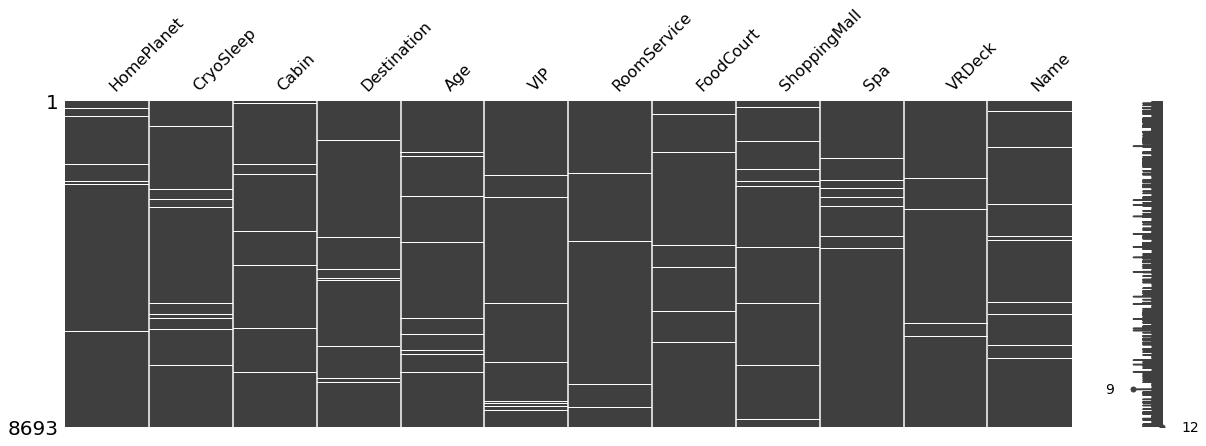

In [9]:
null_cols = null_columns.index

# Visual representation of columns with missing values
import missingno as mno
mno.matrix(train[null_cols], figsize = (20, 6))
plt.show()


### inferences
<ul>
    <li>the number of missing value is too small</li>
    <li>there is no big correlation between missing values in the dataset</li>
    <li>we can either drop it or fill it</li>
    <li>here i will fill it</li>
    <li>there 4 main ways to fill a missing value</li>
    <ol>
        <li>mean</li>
        <li>median</li>
        <li>most frequent</li>
        <li>constant value</li>
    </ol>
    <li>to choose a one methode from here we should plot the distribution and box blot because mean get affected by outliers</li>

</ul>

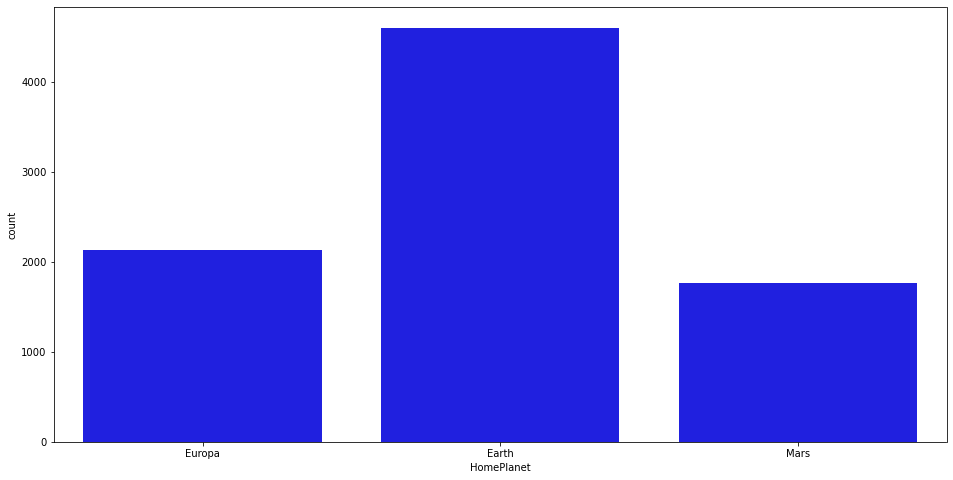

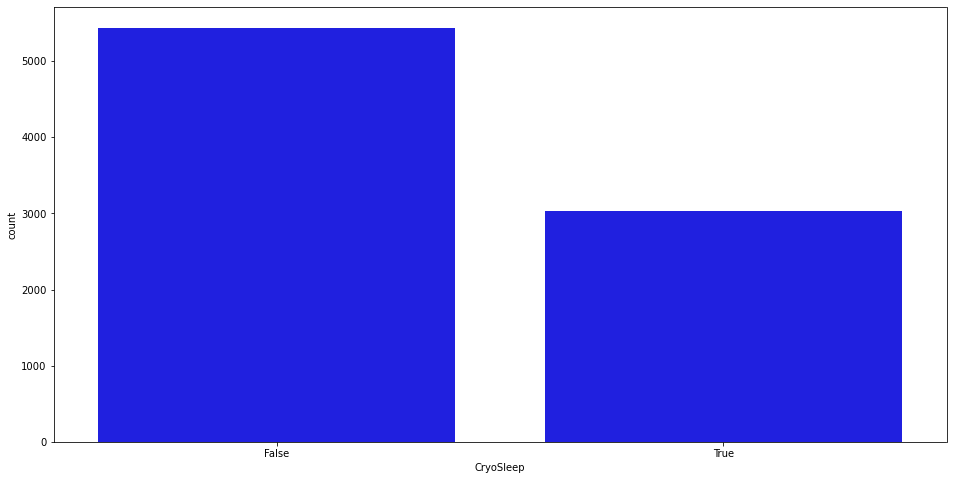

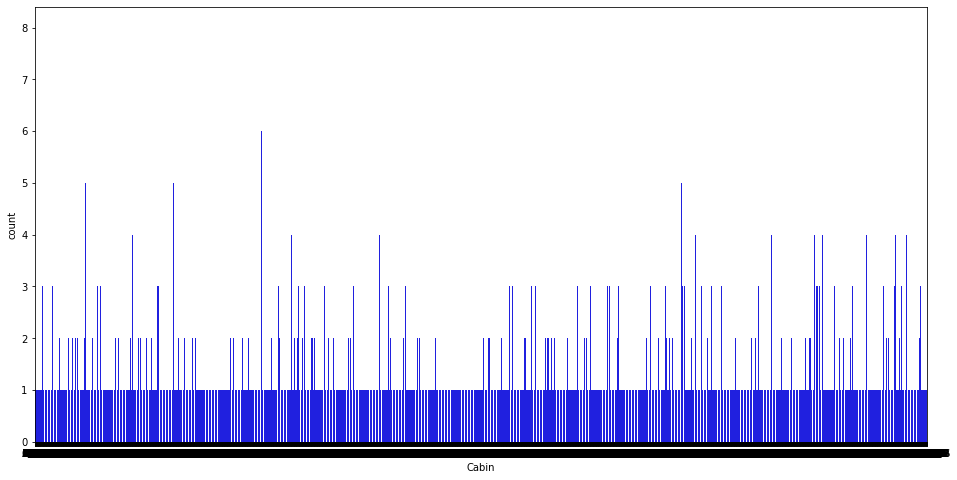

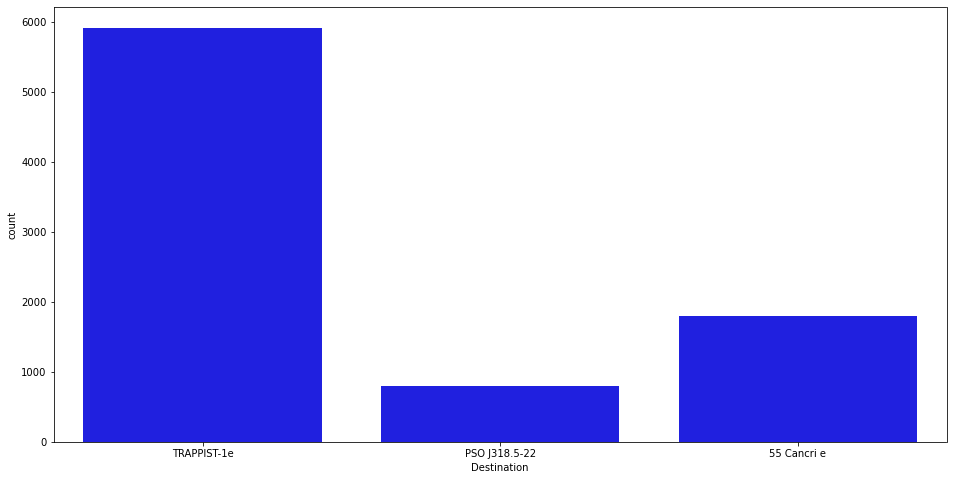

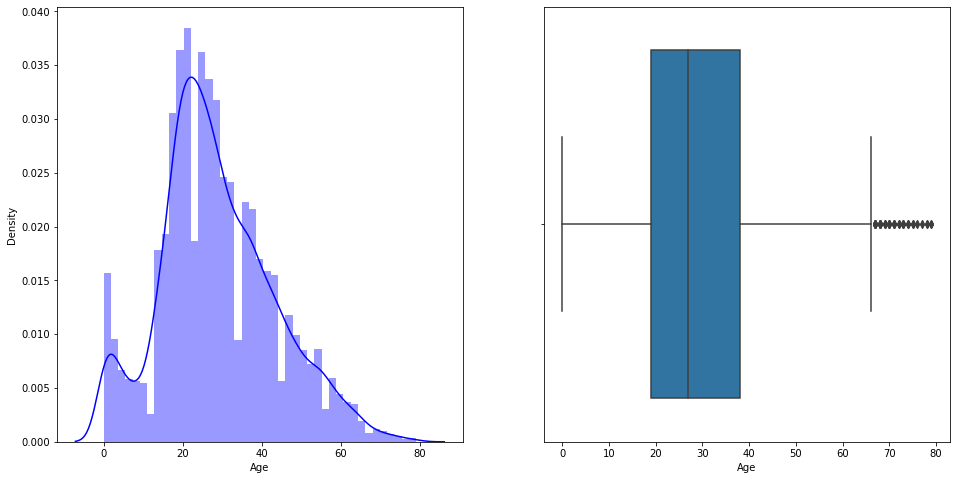

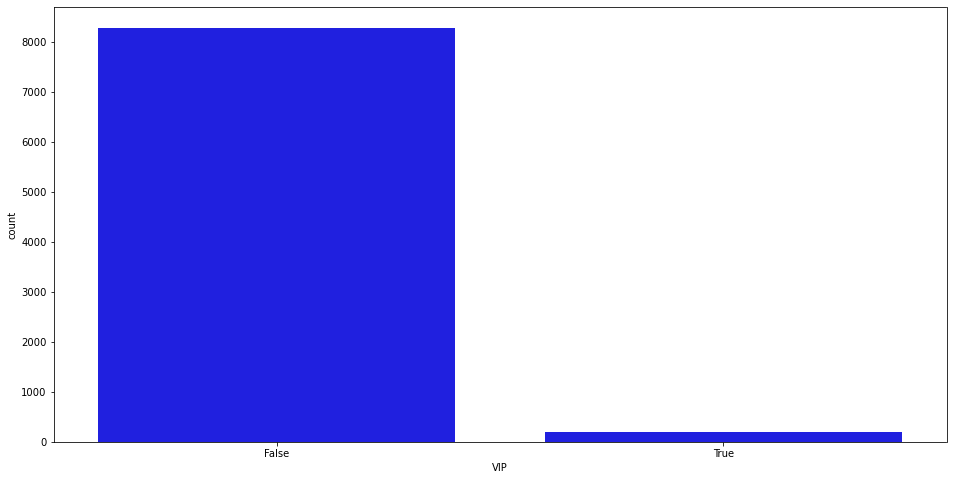

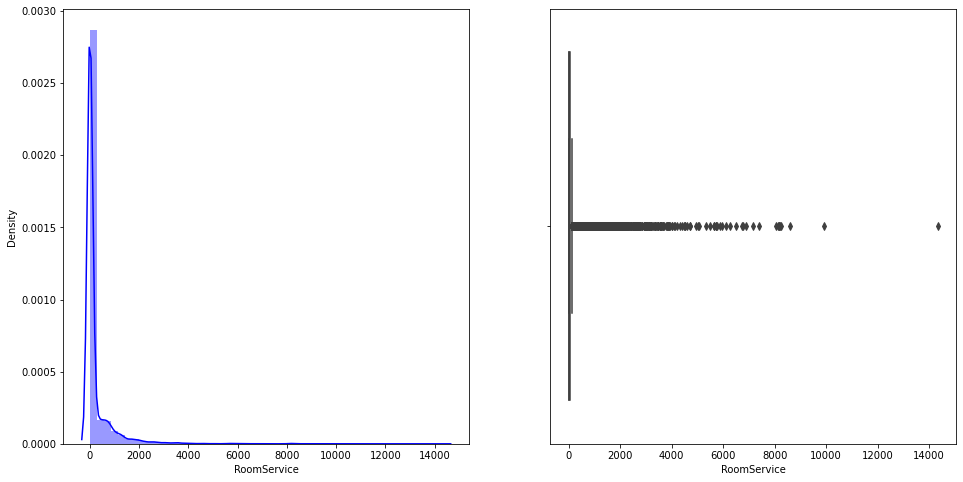

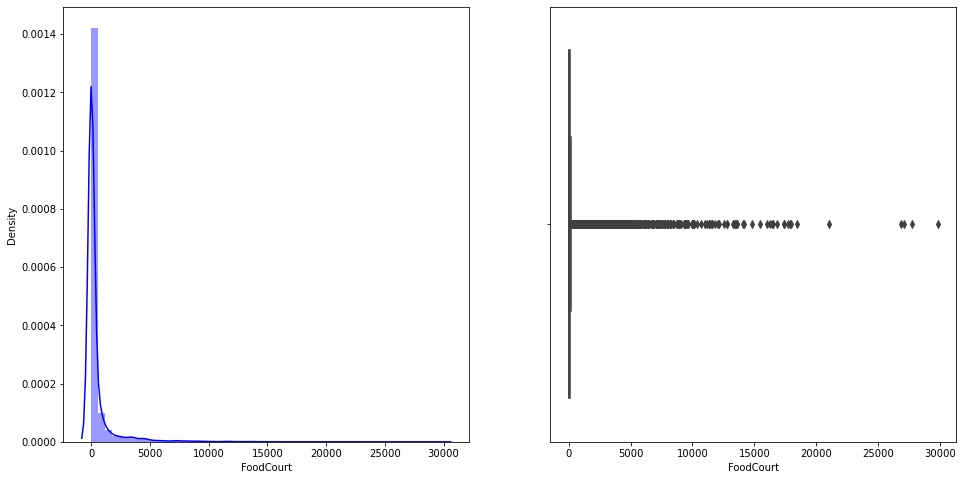

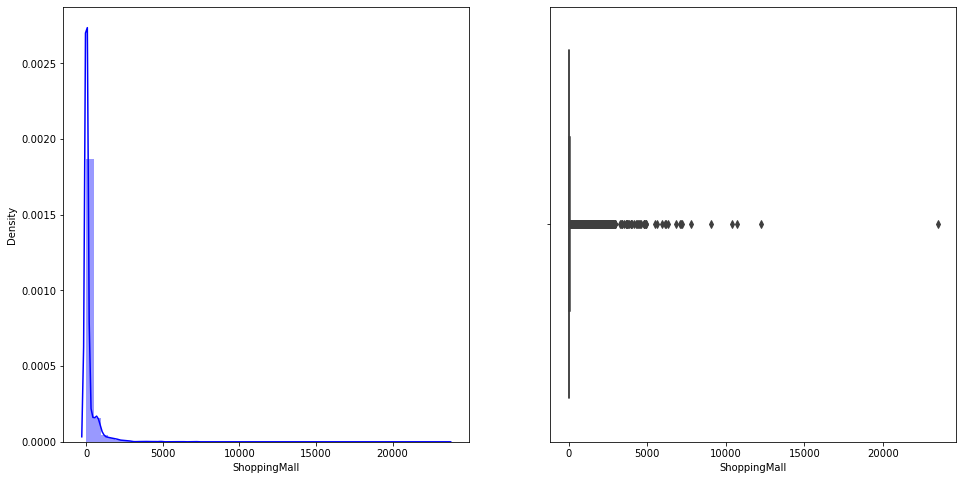

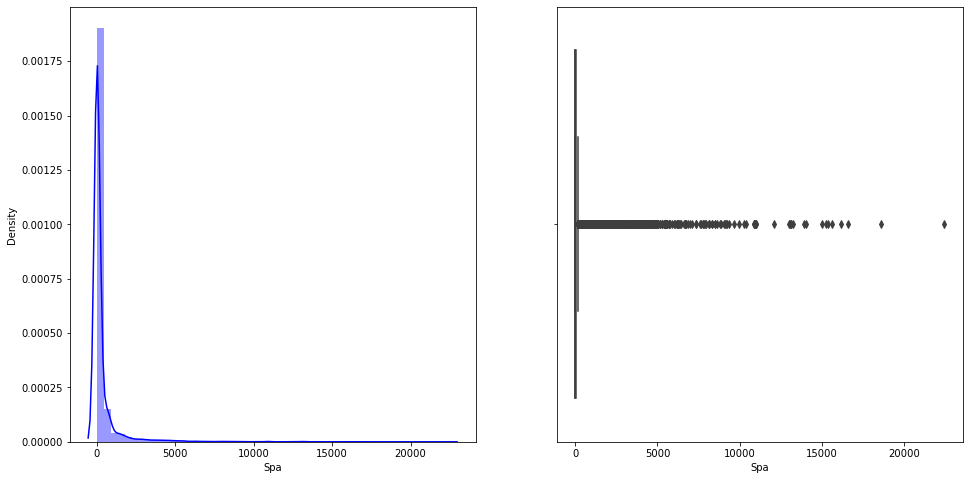

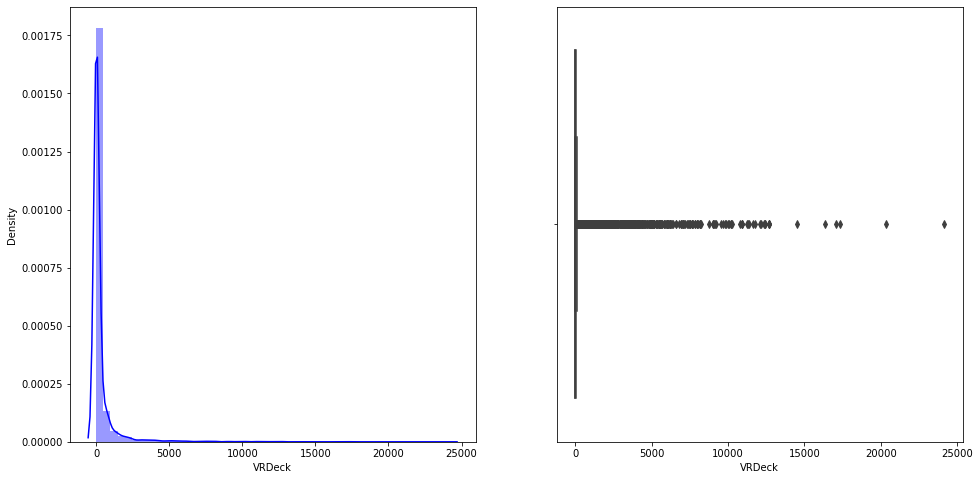

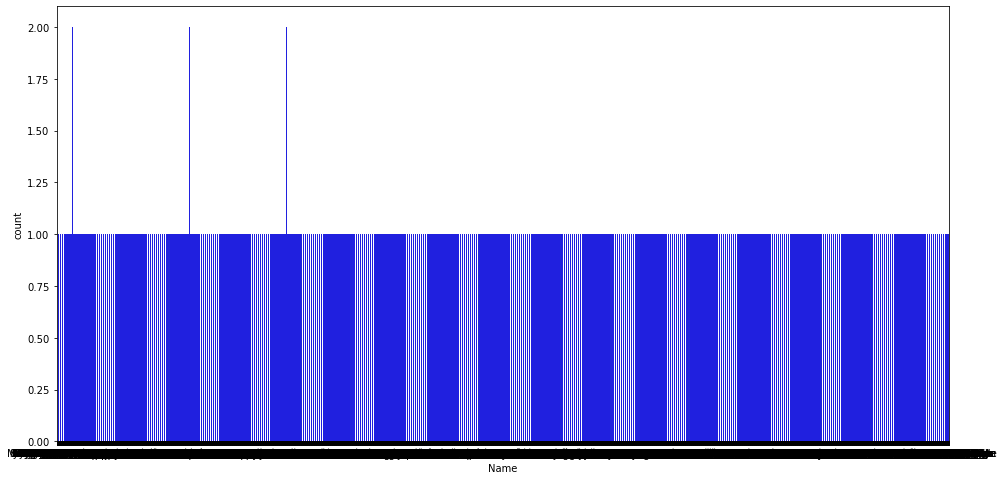

In [10]:
for i, col in enumerate(null_cols):
    plt.figure(figsize=(16,8))
    
    if train[col].dtype == 'O':
        plt.subplot(1,1,1)
        sns.countplot(train[col], color='blue')
    else:
        plt.subplot(1,2,1)
        sns.distplot(train[col], color='blue')
        plt.subplot(1,2,2)
        sns.boxplot(train[col])
    plt.show();

### inferences
<ul>
    <li>as we can see from the figures cabin and name has no unique values so we sure it has no enfeluence on the target coloumn so i will drop them</li>
    <li>from the distributions above there is alot of outliers and most of the distribution is right skwed so we will choose the most frequent type to fill the miissing vakues</li>
</ul>

In [11]:
#droping the name and cabin coloumn from both datasets

train.drop(['Name', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Name', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [12]:
#using SimpleImputer with most_frequent strategy

from sklearn.impute import SimpleImputer

most_freq_imputer = SimpleImputer(strategy='most_frequent', )
train_imputed = most_freq_imputer.fit_transform(train)
test_imputed = most_freq_imputer.fit_transform(test_df)

train_im = pd.DataFrame(train_imputed, columns=train.columns)
test_im = pd.DataFrame(test_imputed, columns=test_df.columns)


train_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    8693 non-null   object
 1   CryoSleep     8693 non-null   object
 2   Destination   8693 non-null   object
 3   Age           8693 non-null   object
 4   VIP           8693 non-null   object
 5   RoomService   8693 non-null   object
 6   FoodCourt     8693 non-null   object
 7   ShoppingMall  8693 non-null   object
 8   Spa           8693 non-null   object
 9   VRDeck        8693 non-null   object
dtypes: object(10)
memory usage: 679.3+ KB


In [13]:
cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in cols:
    train_im[i] = train_im[i].astype(np.float64)

train_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
dtypes: float64(6), object(4)
memory usage: 679.3+ KB


#### as we can see we handled all the null values

# Data Preprocessing

#### lets devide the train into numerical and categorical and analyze each category

In [14]:
numerical_columns = [i for i in train_im.columns if train_im[i].dtype=='float64']
categorical_columns = [i for i in train_im.columns if train_im[i].dtype=='O']

print('numerical_columns : ', numerical_columns)
print('categorical_columns : ', categorical_columns)

numerical_columns :  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_columns :  ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


#### ploting the counts of catigorical variables

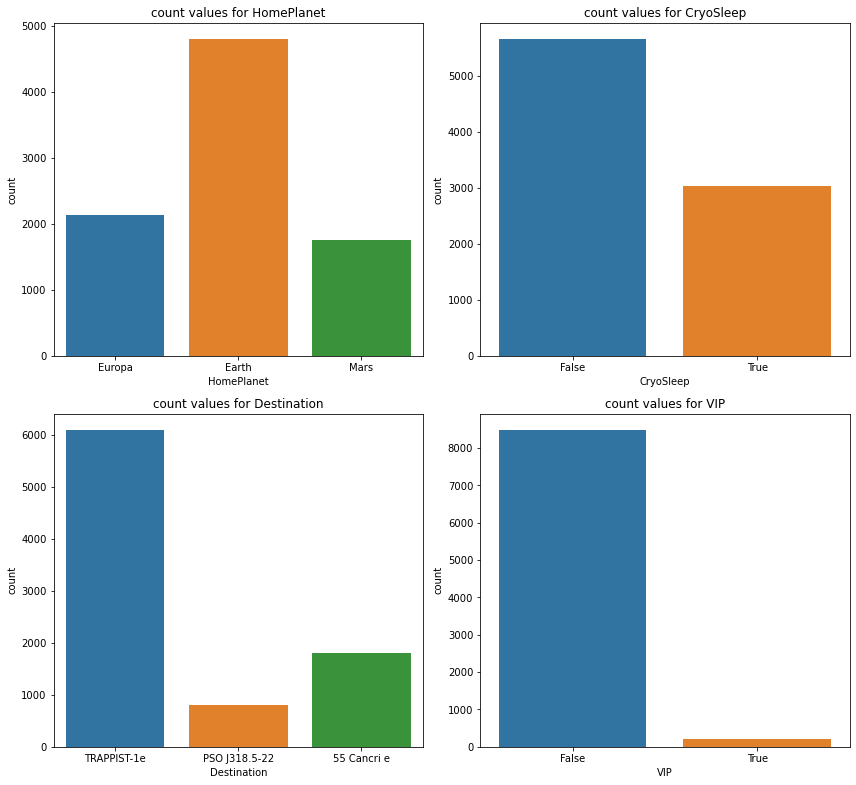

In [15]:
plt.figure(figsize=(12,16))
for i,col in enumerate(categorical_columns):
    plt.subplot(3, 2, i+1);sns.countplot(data=train_im, x=col)
    plt.title(f'count values for {col}')
    
plt.tight_layout()
plt.show()

#### lets take a look at the numerical feautures and plot its distributions

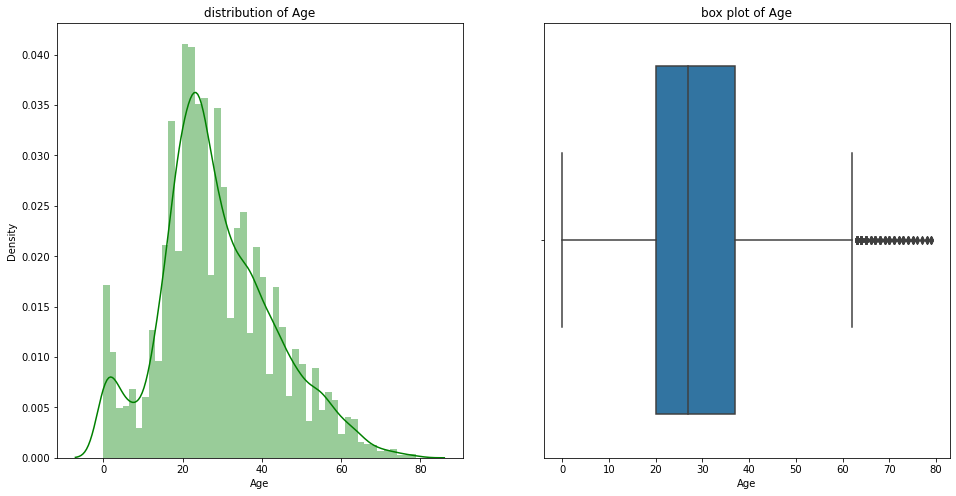

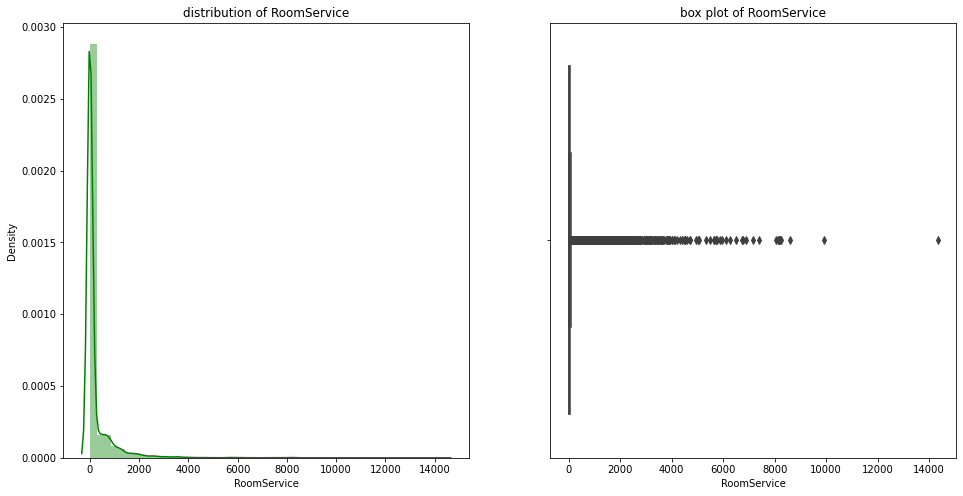

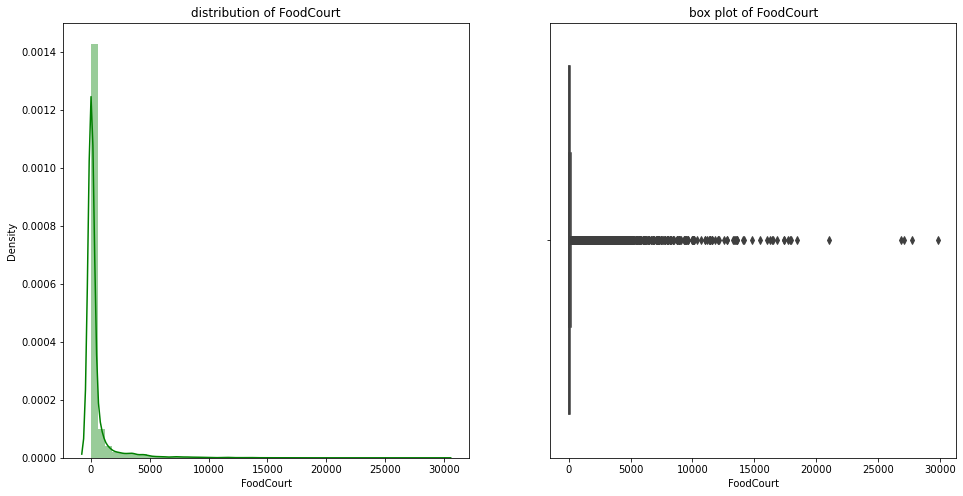

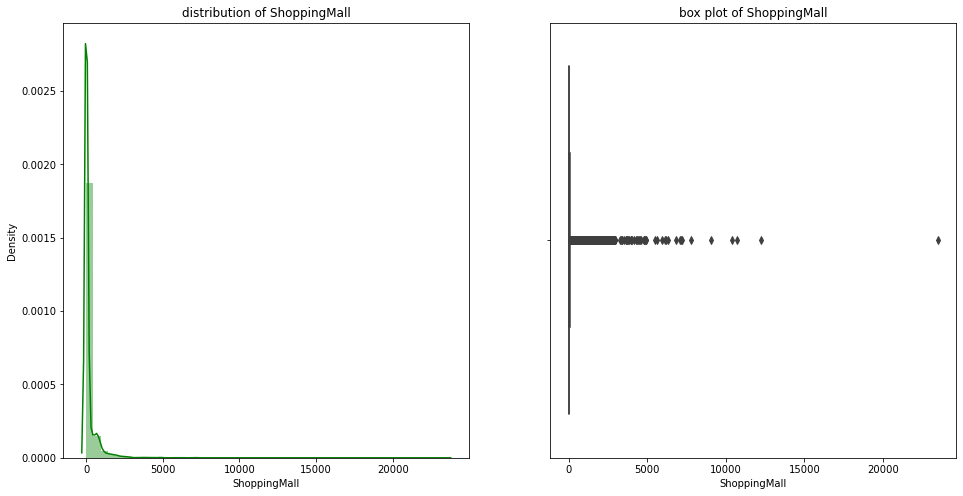

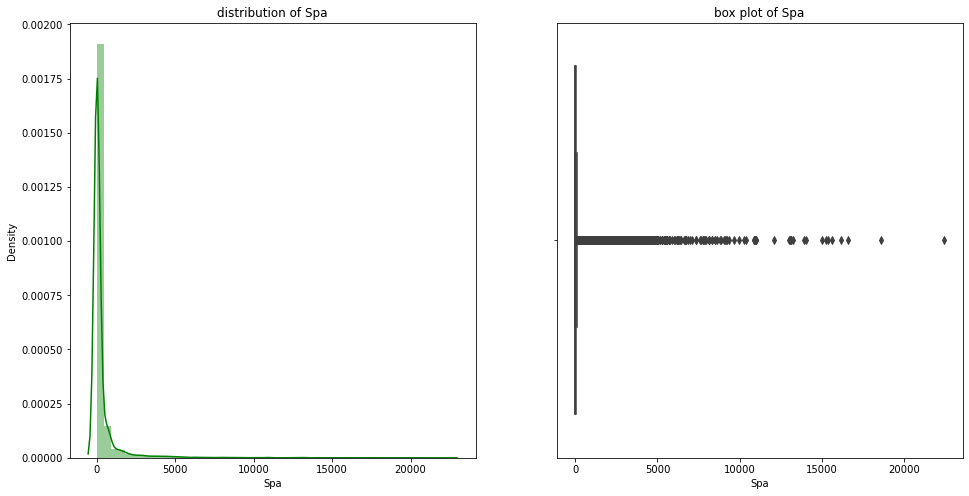

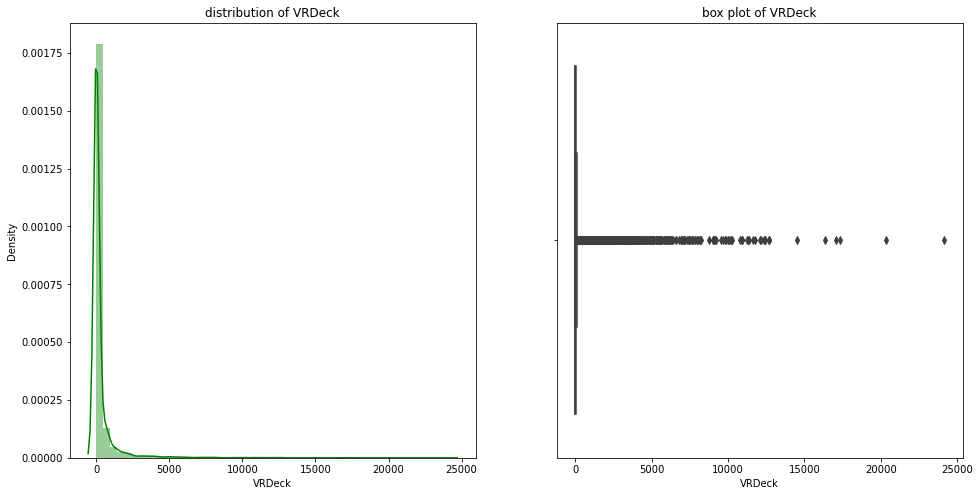

In [16]:
for i,col in enumerate(numerical_columns):
    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    sns.distplot(train_im[col], color='green')
    plt.title(f'distribution of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(train_im[col])
    plt.title(f'box plot of {col}')
    plt.show();



### inferences
<ul>
    <li>there is alot of outliers</li>
    <li> we will try to handle it by using IQR based filtering</li>
</ul>

# Outliers detection

In [17]:
def find_outliers(col):
    q1 = train_im[col].quantile(0.25)
    q3 = train_im[col].quantile(0.75)
    iqr = q3 - q1
    
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    
    train_im[train_im[col] > upper_limit]
    train_im[train_im[col] < lower_limit]
    
    new_df = train_im[train_im[col] < upper_limit]
    
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(train_im[col])
    plt.subplot(2,2,2)
    sns.boxplot(train_im[col])
    plt.subplot(2,2,3)
    sns.distplot(new_df[col])
    plt.subplot(2,2,4)
    sns.boxplot(new_df[col])

    return plt.show()

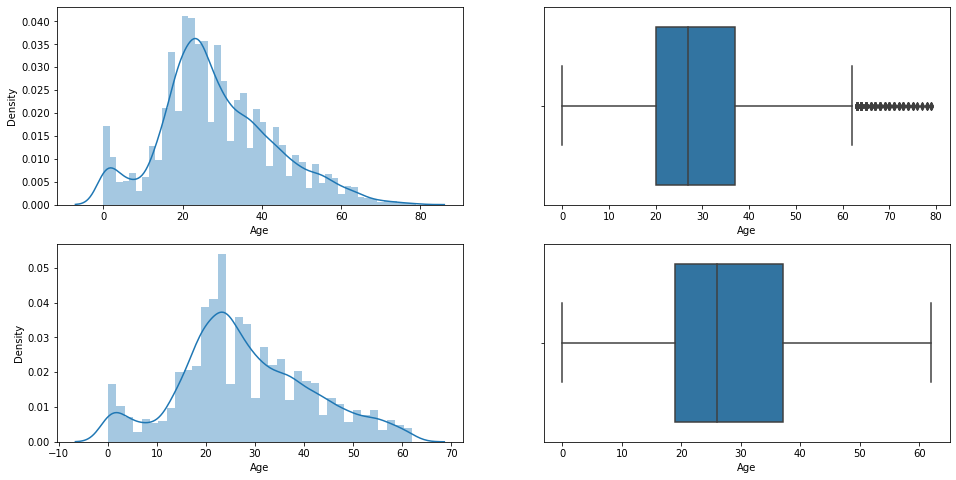

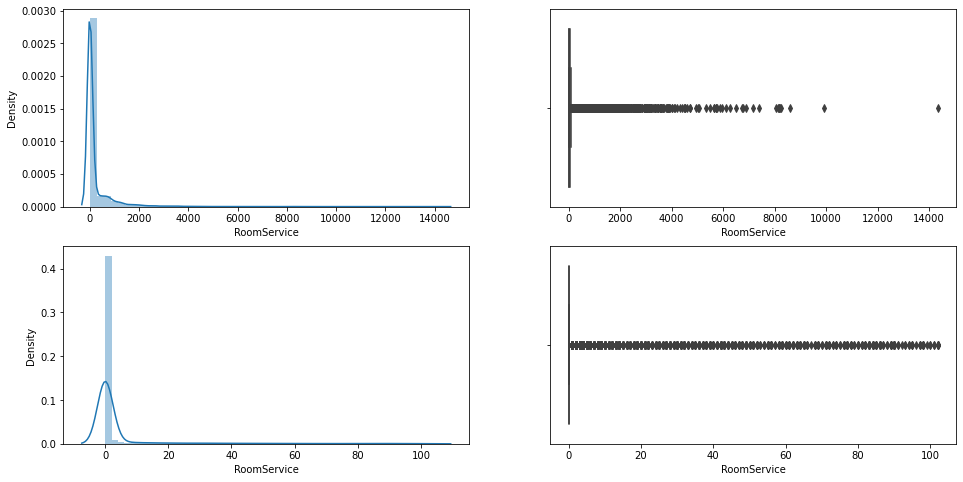

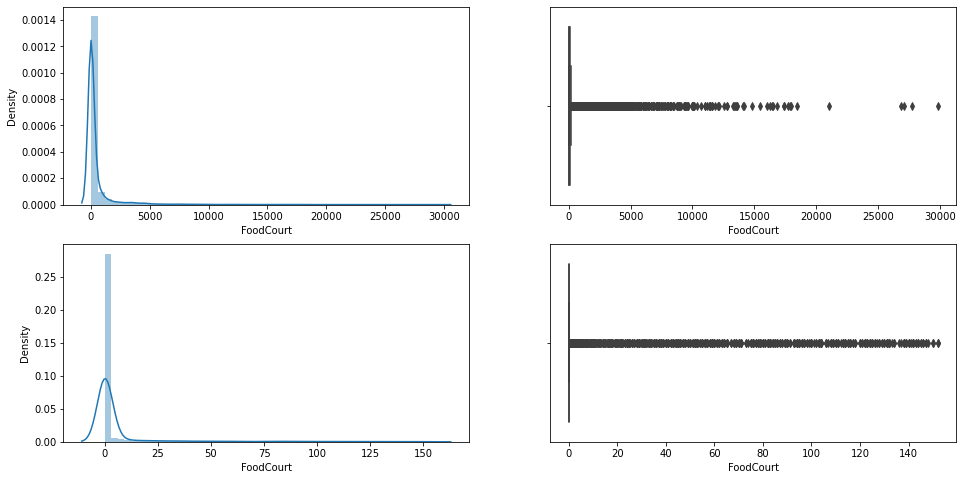

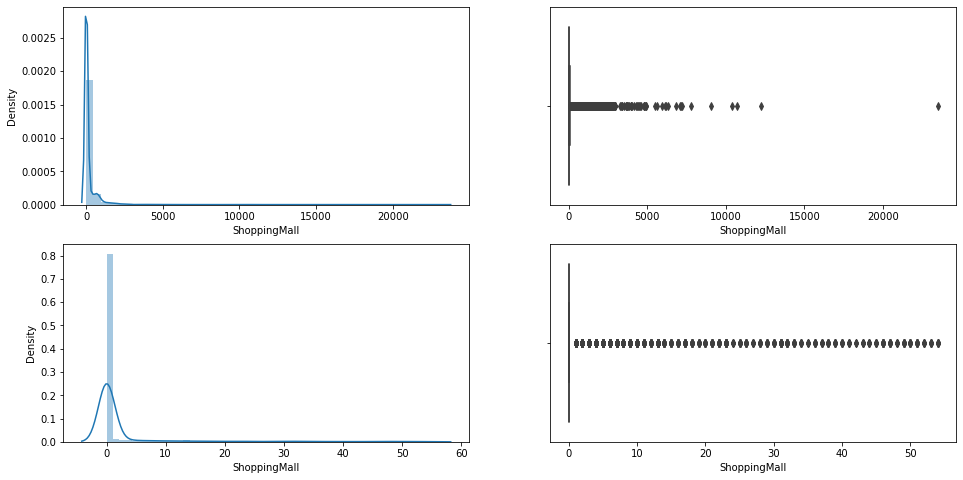

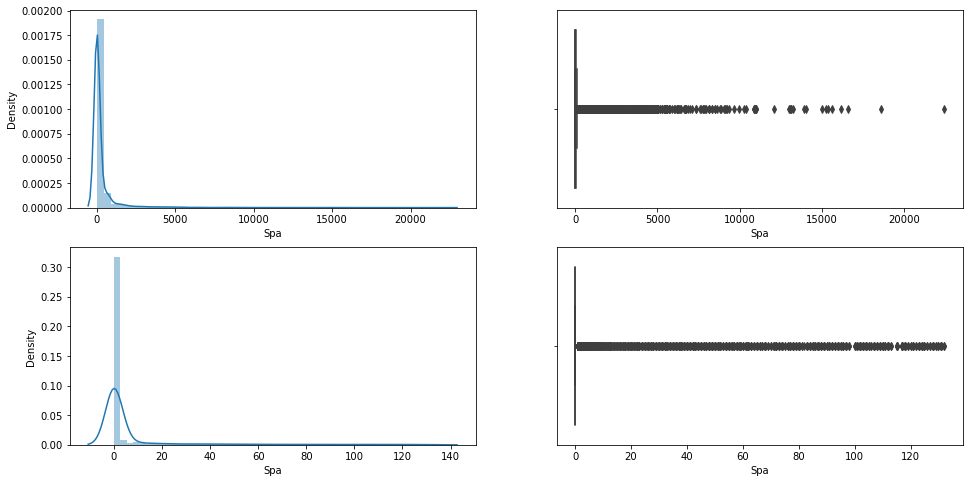

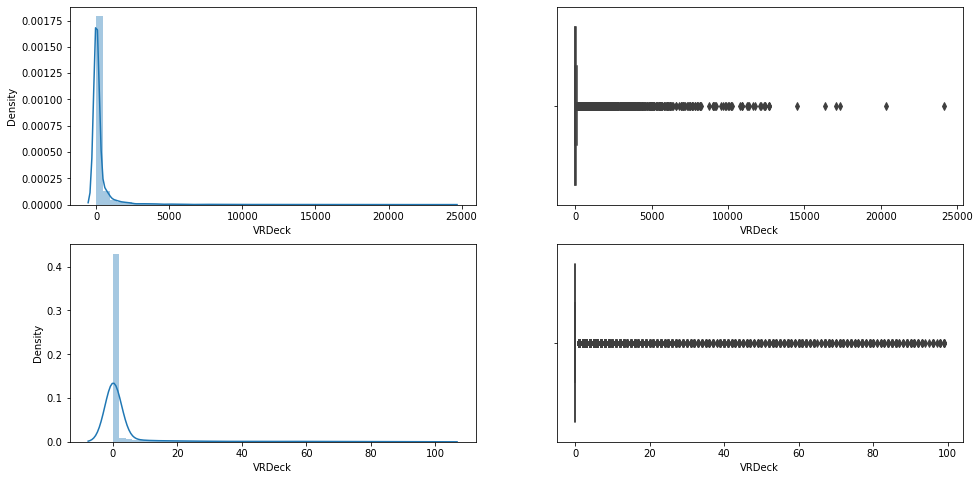

In [18]:
for col in numerical_columns:
    find_outliers(col)

### inferences
<ul>
    <li>there is no much change in the distribution</li>
    <li>so no need to apply it the acual tain data</li>
</ul>

# Data Scaling & Encoding

<ul>
    <li>data encoding is a technique to transform the categorical data feature into numerical feature so we can feed it to a machine learning algorithm</li>
    <li>data scaling is a technique to make the data on the same scale and there are alot of technique to do so</li>
    <ol>
        <li>StandardScaler => is a technique that tranform the data using its mean and std deviation by subtract the mean and devide by the std dev</li>
        <li>MinMaxScaler => is a technique that subtract the min and devide by the diff bettwen the max and min of the feature</li>
    </ol>
</ul>

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

transformer_list = [
    ('encoder', OneHotEncoder(dtype="int", drop="first"), categorical_columns),
    ('scale', StandardScaler(), numerical_columns)
]

column_transformer = ColumnTransformer(transformer_list)
train_transformed_raw  = column_transformer.fit_transform(train_im)
test_transforme_raw = column_transformer.fit_transform(test_im)

scale_encoded_train = pd.DataFrame(
    train_transformed_raw, 
    columns=column_transformer.get_feature_names_out())

scale_encoded_test = pd.DataFrame(
    test_transforme_raw, 
    columns=column_transformer.get_feature_names_out())


In [20]:
print('scale_encoded_train shape : ', scale_encoded_train.shape)
print('scale_encoded_test shape : ', scale_encoded_test.shape)

scale_encoded_train shape :  (8693, 12)
scale_encoded_test shape :  (4277, 12)


In [21]:
#encode the label

lbl_col = LabelEncoder().fit_transform(target)
target_encoded = pd.Series(lbl_col, name='Transported')

target_encoded.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

# Feature Importance

<ul>
    <li>i will draw the correlation between the features and the target to select the best features to reduce the dimintion of the data </li>
</ul>

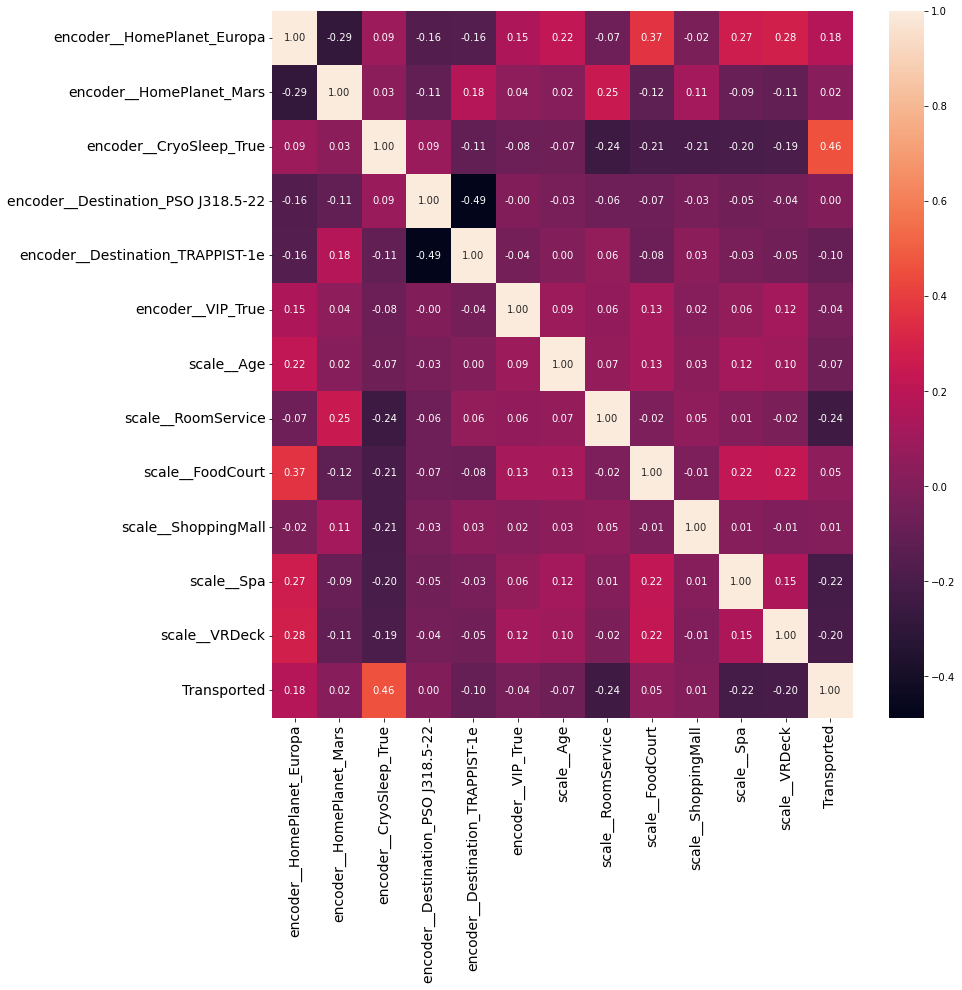

In [22]:
plt.figure(figsize=(13, 13))
corr_train = scale_encoded_train.copy()
corr_train['Transported'] = lbl_col
sns.heatmap(corr_train.corr(), annot=True, fmt='.2f')
plt.xticks(size=14)
plt.yticks(size=14)
plt.show();

### inferences
<ul>
    <li>from the correlation matrix we can see that there are one coloumn that doesnot affect our target at all so i will drop them</li>
</ul>

In [23]:
scale_encoded_train.drop(['encoder__Destination_PSO J318.5-22'], axis=1, inplace=True)
scale_encoded_test.drop(['encoder__Destination_PSO J318.5-22'], axis=1, inplace=True)

# Model Selection

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scale_encoded_train, target_encoded, random_state=0, test_size=.2)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel='linear', C=10),
    SVC(kernel='poly', C=10),
    SVC(kernel='rbf', C=10),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier()
]


In [26]:
from time import time

for model in classifiers:
    start = time()
    model.fit(x_train, y_train)
    train_time = time()-start
    start = time()
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    prediction_time = time()-start
    
    print(model)
    print(f'train time {train_time}')
    print(f'prediction time {train_time}')
    print(f'model train accuracy {accuracy_score(y_train, y_predict_train)}')
    print(f'model test accuracy {accuracy_score(y_test, y_predict_test)}')
    print(classification_report(y_test, y_predict_test))

LogisticRegression()
train time 0.03699231147766113
prediction time 0.03699231147766113
model train accuracy 0.7900488927236123
model test accuracy 0.7791834387579069
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       863
           1       0.77      0.80      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

KNeighborsClassifier()
train time 0.015210628509521484
prediction time 0.015210628509521484
model train accuracy 0.8241299971239574
model test accuracy 0.7682576193214491
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       863
           1       0.76      0.79      0.77       876

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

SVC(C=10

### inferences
<ul>
    <li>from the previous classifiers we found that Gradient Boosting Classifier is the best one so lets find its best parameter</li>
</ul>

# Model Tuning

### Gradient Boosting Classifier

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

param_grid = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [.001, .01, .05],
    'criterion': ['friedman_mse', 'mse'],
    'max_depth': [3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}

gb = GradientBoostingClassifier()
grid_search = GridSearchCV(gb, param_grid,scoring=scoring, refit='accuracy', cv=2)
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 7, 'max_features': 'log2'}
Best score:  0.7937877480586712


In [28]:
gdc = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.05, loss='deviance', max_depth=7, max_features='log2')
gdc.fit(x_train, y_train)
y_predict_train = gdc.predict(x_train)
y_predict_test  = gdc.predict(x_test)

train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy  = accuracy_score(y_test, y_predict_test)

print('train accuracy : ', train_accuracy)
print('test accuracy : ', test_accuracy)

train accuracy :  0.8409548461317228
test accuracy :  0.7929844738355377


In [29]:
test = pd.read_csv('/kaggle/input/spaceshiptitanic/test.csv')

In [30]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Transported'] = gdc.predict(scale_encoded_test)

submission['Transported'].replace({0: 'False', 1: 'True'}, inplace=True)

In [31]:
submission.to_csv('out.csv', index=False)